In [96]:
import ast

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import os
os.chdir("..")

In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("./src")
import data

----

In [4]:
EXP_CONDITIONS = ["verb", "syntax"]

In [5]:
raw = data.load_raw_results()

In [6]:
import json
json.loads(raw.iloc[6].datastring)

{'condition': 0,
 'counterbalance': 0,
 'assignmentId': '3S06PH7KSSSUFNCPLD54ZDUN7BU1DK',
 'workerId': 'A2GNG7DWHQA6ZZ',
 'hitId': '3TD33TP5DLQU7UTCDY2PR432H69ABU',
 'currenttrial': 28,
 'bonus': 0,
 'data': [{'uniqueid': 'A2GNG7DWHQA6ZZ:3S06PH7KSSSUFNCPLD54ZDUN7BU1DK',
   'current_trial': 0,
   'dateTime': 1584480556313,
   'trialdata': {'view_history': '[{"page_index":0,"viewing_time":9009},{"page_index":1,"viewing_time":16664}]',
    'rt': 25674,
    'trial_type': 'instructions',
    'trial_index': 0,
    'time_elapsed': 25675,
    'internal_node_id': '0.0-0.0'}},
  {'uniqueid': 'A2GNG7DWHQA6ZZ:3S06PH7KSSSUFNCPLD54ZDUN7BU1DK',
   'current_trial': 1,
   'dateTime': 1584480560065,
   'trialdata': {'rt': 3751,
    'responses': '{"Q0":"34"}',
    'trial_type': 'survey-text',
    'trial_index': 1,
    'time_elapsed': 29427,
    'internal_node_id': '0.0-1.0'}},
  {'uniqueid': 'A2GNG7DWHQA6ZZ:3S06PH7KSSSUFNCPLD54ZDUN7BU1DK',
   'current_trial': 2,
   'dateTime': 1584480563377,
   'trialdat

In [40]:
trials_df = data.get_trials_df(data.load_raw_results(),
                               extract_data_fields=("stage", "condition", "item_idx", 
                                                    # test trial data
                                                    "verb", "scenes", "sentences", "slider_labels", "response"))
trials_df["is_train_trial"] = trials_df.stage == "train"
trials_df["is_test_trial"] = trials_df.stage == "test"

# # Extract train--test sequences
# trials_df["is_train_trial"] = False
# trials_df["is_test_trial"] = False
# trials_df["chunk"] = None
# # TODO mark training and test trials more explicitly next time ..
# train_trial_idxs, test_trial_idxs = [], []
# train_chunks, test_chunks = [], []
# for uid, subj_trials in trials_df.groupby("uniqueid"):
#     chunk = -1
#     for trial_index, trial in subj_trials.sort_index().iterrows():
#         if trial.trial_type == "instructions" and trial.condition in EXP_CONDITIONS:
#             # New chunk.
#             chunk += 1
#         elif trial.trial_type == "html-keyboard-response" or trial.trial_type == "delayed-html-keyboard-response":
#             # Training trial.
#             trials_df.loc[trial_index, ["is_train_trial", "chunk"]] = True, chunk
#         elif trial.trial_type == "survey-multi-choice" and chunk >= 0:
#             trials_df.loc[trial_index, ["is_test_trial", "chunk"]] = True, chunk

train_trials_df = trials_df[trials_df.is_train_trial]
test_trials_df = trials_df[trials_df.is_test_trial]
len(train_trials_df), len(test_trials_df)

Missing datastring for uid A3U6IA3JUSFZ2M:39LOEL67OTTE8VUDR9871EVJU4B388. Status was 1.
Missing datastring for uid A24B5UF6RMHYGX:34Z02EIMIT11PNN4BK1JQCTZ55BT0R. Status was 1.
Missing datastring for uid A2JDYN6QM8M5UN:3KXIR214I54O4CBSB64P1SAMM4242E. Status was 1.
Missing datastring for uid A3TUCOUVSP9ZGY:3KXIR214I54O4CBSB64P1SAMM4242E. Status was 1.
Missing datastring for uid A3A8P4UR9A0DWQ:3FTF2T8WLS6BDYFB6LPN671RCAF9WF. Status was 1.
Missing datastring for uid AETIZKQNUSBLB:3VHP9MDGRO8B0A0JSGPE49GZNSSCF1. Status was 1.


(468, 234)

In [41]:
train_trials_df.head(10)

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,stage,item_idx,verb,scenes,sentences,slider_labels,response,survey_question_idx,survey_answer,is_train_trial,is_test_trial
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,
4,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,5039,0.0-3.0-1.0,train,2.0,walk,None,None,None,None,NaN,NaN,True,False
5,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,6316,0.0-3.0-2.0,train,2.0,walk,None,None,None,None,NaN,NaN,True,False
8,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,1746,0.0-4.0-1.0,train,11.0,carry,None,None,None,None,NaN,NaN,True,False
9,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,1191,0.0-4.0-2.0,train,11.0,carry,None,None,None,None,NaN,NaN,True,False
12,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,verb,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,2863,0.0-5.0-1.0,train,12.0,watch,None,None,None,None,NaN,NaN,True,False
13,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,verb,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,2586,0.0-5.0-2.0,train,12.0,watch,None,None,None,None,NaN,NaN,True,False
16,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,verb,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,992,0.0-6.0-1.0,train,15.0,jump,None,None,None,None,NaN,NaN,True,False
17,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,verb,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,555,0.0-6.0-2.0,train,15.0,jump,None,None,None,None,NaN,NaN,True,False
20,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,delayed-html-keyboard-response,1402,0.0-7.0-1.0,train,16.0,sit,None,None,None,None,NaN,NaN,True,False


In [42]:
train_trials_df.to_csv("data/train_results.csv")

### Test data preprocessing

In [43]:
# Convert slider response to a "distance from correct verb" measure.
def get_distance_from_correct_verb(test_row):
    # What is the position of the correct verb on the slider?
    correct_verb_index = test_row.slider_labels.index(test_row.verb)
    correct_verb_position = 100 * correct_verb_index
    
    return correct_verb_position - int(test_row.response)

test_trials_df["distance_from_correct"] = test_trials_df.apply(get_distance_from_correct_verb, axis=1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [44]:
# Judge a test trial as correct if the subject was on the right side of the slider.
test_trials_df["correct"] = test_trials_df["distance_from_correct"].abs() < 50

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [154]:
# z-score slider position values within-subject
position_cols = ["response", "distance_from_correct"]
def normalize_positions(subject_rows):
    subject_rows = subject_rows.astype(float)
    return (subject_rows - subject_rows.mean()) / subject_rows.std()
for position_col in position_cols:
    test_trials_df[f"{position_col}_zscore"] = test_trials_df.groupby("uniqueid")[position_col].transform(normalize_positions)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [155]:
test_trials_df.to_csv("data/test_results.csv")

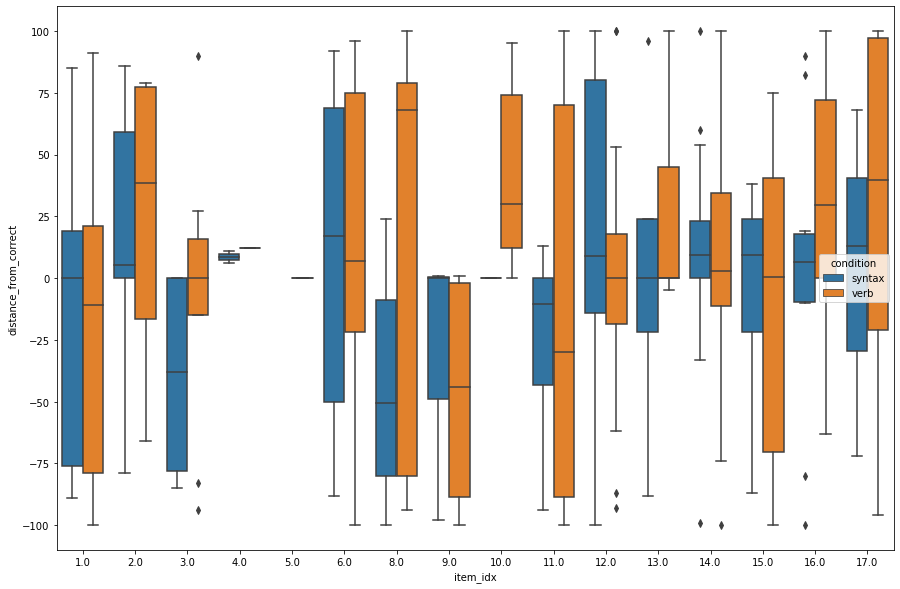

In [192]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=test_trials_df, x="item_idx", hue="condition", y="distance_from_correct")

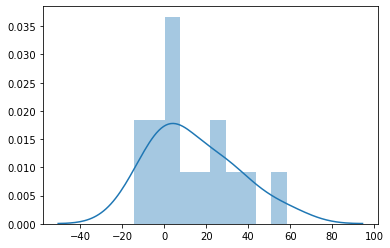

In [213]:
def get_mean_diff(item_rows):
    item_rows = item_rows.set_index("condition")
    try:
        return item_rows.loc["verb"].distance_from_correct.mean() - item_rows.loc["syntax"].distance_from_correct.mean()
    except KeyError:
        return np.nan
sns.distplot(test_trials_df.groupby("item_idx").apply(get_mean_diff).dropna(), bins=10)

-----

## Demographic analysis

Text(0.5, 0, 'Age')

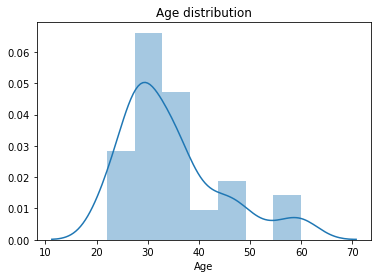

In [46]:
ages = pd.to_numeric(trials_df.loc[1].survey_answer, errors="coerce")

sns.distplot(ages)
plt.title("Age distribution")
plt.xlabel("Age")

In [47]:
trials_df.loc[2].groupby("survey_question_idx").survey_answer.value_counts()

survey_question_idx  survey_answer    
0                    Bachelor's degree    18
                     Some college         11
                     Master's degree       8
                     High school/GED       2
1                    Yes                  38
                     No                    1
Name: survey_answer, dtype: int64

### Comments

In [48]:
trials_df.loc[15].survey_answer.unique()

array([nan], dtype=object)

## Reaction time analyses

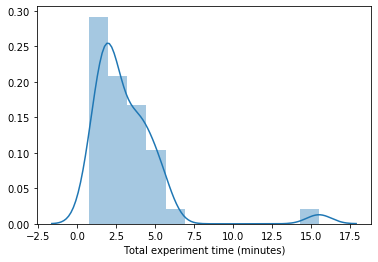

In [49]:
sns.distplot(trials_df.groupby("uniqueid").rt.sum() / 1000 / 60, axlabel="Total experiment time (minutes)")

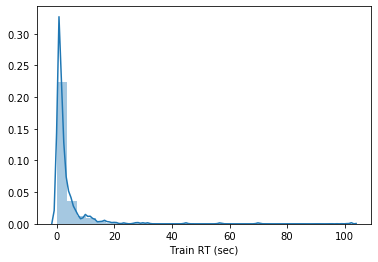

In [50]:
sns.distplot(train_trials_df.rt / 1000, bins=30, axlabel="Train RT (sec)")

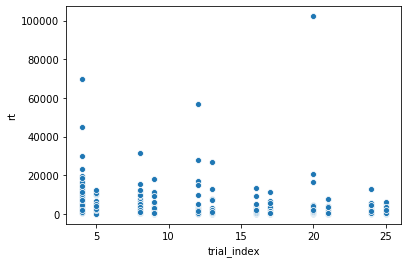

In [51]:
sns.scatterplot(data=train_trials_df.reset_index(), x="trial_index", y="rt")

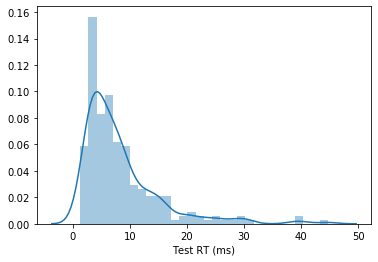

In [52]:
sns.distplot(test_trials_df.rt / 1000, bins=30, axlabel="Test RT (ms)")

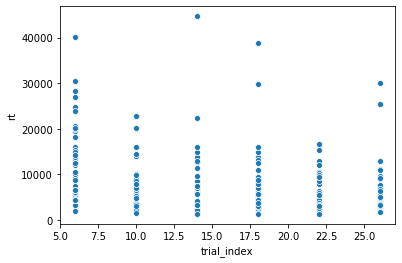

In [53]:
sns.scatterplot(data=test_trials_df.reset_index(), x="trial_index", y="rt")

## Coarse accuracy analyses

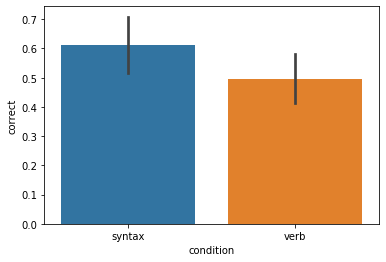

In [54]:
sns.barplot(data=test_trials_df.reset_index(),
            x="condition", y="correct")

In [55]:
test_trials_df.groupby("condition").correct.mean()

condition
syntax    0.611650
verb      0.496183
Name: correct, dtype: float64

In [56]:
test_trials_df.groupby(["item_idx", "condition"]).size()

item_idx  condition
1.0       syntax        9
          verb         15
2.0       syntax        6
          verb          4
3.0       syntax        4
          verb          9
4.0       syntax        2
          verb          1
5.0       verb          2
6.0       syntax        6
          verb          6
8.0       syntax        6
          verb          5
9.0       syntax        3
          verb          4
10.0      syntax        3
          verb          5
11.0      syntax       10
          verb         10
12.0      syntax       17
          verb         19
13.0      syntax        4
          verb          7
14.0      syntax       16
          verb         16
15.0      syntax        4
          verb         10
16.0      syntax       10
          verb         10
17.0      syntax        3
          verb          8
dtype: int64

In [57]:
test_trials_df.groupby(["item_idx", "condition"]).correct.mean()

item_idx  condition
1.0       syntax       0.555556
          verb         0.400000
2.0       syntax       0.500000
          verb         0.250000
3.0       syntax       0.500000
          verb         0.666667
4.0       syntax       1.000000
          verb         1.000000
5.0       verb         1.000000
6.0       syntax       0.333333
          verb         0.500000
8.0       syntax       0.500000
          verb         0.000000
9.0       syntax       0.666667
          verb         0.500000
10.0      syntax       1.000000
          verb         0.600000
11.0      syntax       0.800000
          verb         0.200000
12.0      syntax       0.529412
          verb         0.684211
13.0      syntax       0.500000
          verb         0.714286
14.0      syntax       0.750000
          verb         0.625000
15.0      syntax       0.750000
          verb         0.400000
16.0      syntax       0.600000
          verb         0.500000
17.0      syntax       0.333333
          verb      

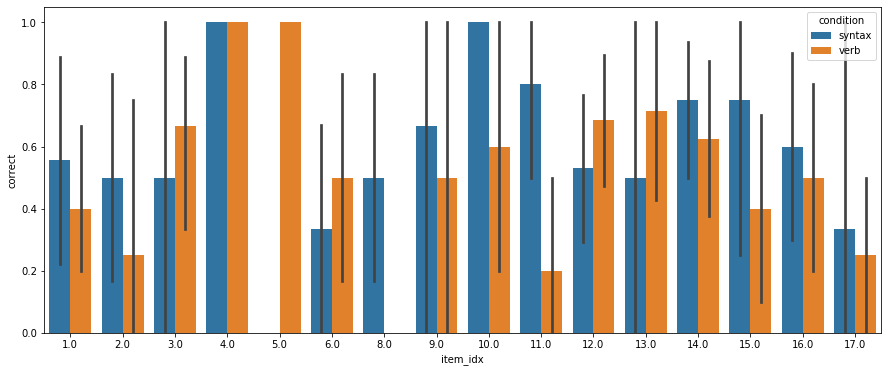

In [58]:
plt.subplots(figsize=(15, 6))
sns.barplot(data=test_trials_df, x="item_idx", hue="condition", y="correct")

## Model-based analysis

Now compare subject responses with the model-driven predictions.

In [156]:
test_trials_df

,,condition,counterbalance,assignmentId,workerId,hitId,trial_type,rt,internal_node_id,stage,item_idx,...,survey_answer,is_train_trial,is_test_trial,distance_from_correct,correct,scenes_hash,sentences_hash,subject_posterior,response_zscore,distance_from_correct_zscore
trial_index,uniqueid,,,,,,,,,,,,,,,,,,,,,
6,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,html-slider-response,12084,0.0-3.0-3.0,test,2.0,...,NaN,False,True,-79,False,1673829668028560981,1478743704822824840,0.105,0.692062,-0.682266
10,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,html-slider-response,8175,0.0-4.0-3.0,test,11.0,...,NaN,False,True,-7,True,1680171701720776756,4918371552111408621,0.465,-1.056305,0.405332
14,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,verb,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,html-slider-response,7982,0.0-5.0-3.0,test,12.0,...,NaN,False,True,-87,False,1161387334540989781,9071679886212293147,0.065,0.886324,-0.803110
18,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,verb,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,html-slider-response,13828,0.0-6.0-3.0,test,15.0,...,NaN,False,True,75,False,1162342923881660506,-7174465927499887714,0.875,-0.619213,1.643984
22,A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT,syntax,0,33LK57MYLUTXC8GFQE9LM60ZLTGSZT,A270HX8LH9LJ8W,3UL5XDRDNC7EZQJOFQRYSRXFHMN58K,html-slider-response,16265,0.0-7.0-3.0,test,16.0,...,NaN,False,True,-9,True,1670995629197301806,-6243990526409178309,0.455,-1.007739,0.375120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM,syntax,0,3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM,A3GHPWV5J07UE8,30U1YOGZGAKRMNDQ8UFM7UL861ESD9,html-slider-response,4706,0.0-4.0-3.0,test,10.0,...,NaN,False,True,0,True,1667583196323241031,1010983940740821923,0.500,0.408248,0.000000
14,A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM,verb,0,3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM,A3GHPWV5J07UE8,30U1YOGZGAKRMNDQ8UFM7UL861ESD9,html-slider-response,9529,0.0-5.0-3.0,test,11.0,...,NaN,False,True,-100,False,1680171701720776756,-7201759691126902053,0.000,0.408248,-1.581139
18,A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM,verb,0,3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM,A3GHPWV5J07UE8,30U1YOGZGAKRMNDQ8UFM7UL861ESD9,html-slider-response,8759,0.0-6.0-3.0,test,12.0,...,NaN,False,True,100,False,1161387334540989781,9071679886212293147,1.000,-2.041241,1.581139


In [157]:
model_predictions = pd.read_csv("data/model_predictions.csv",
                                converters={"scene_set": ast.literal_eval,
                                            "frame_set": ast.literal_eval,
                                            "sentence_set": ast.literal_eval})

In [158]:
test_trials_df.scenes.transform(tuple).transform(hash)

trial_index  uniqueid                                     
6            A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT    1141429956970501381
10           A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT    1157575664022073006
14           A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT    1161387334540989781
18           A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT    1171023682804586456
22           A270HX8LH9LJ8W:33LK57MYLUTXC8GFQE9LM60ZLTGSZT    1160764351162452656
                                                                     ...         
10           A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM    1667583196323241031
14           A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM    1157575664022073006
18           A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM    1185389385949002181
22           A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM    1697230157293314081
26           A3GHPWV5J07UE8:3WAKVUDHUX4U7B2DWOC2ANPOWEG7UM    4448077016628655581
Name: scenes, Length: 234, dtype: int64

In [159]:
model_predictions.scene_set

0              (2377225,)
1              (2377225,)
2              (2407876,)
3              (2407876,)
4      (2377225, 2407876)
              ...        
155            (2412017,)
156            (2412017,)
157             (713937,)
158             (713937,)
159     (2412017, 713937)
Name: scene_set, Length: 160, dtype: object

In [160]:
# HACK: We want to join these two dfs on tuple-valued keys (e.g. the set of scenes observed by the subject/model).
# So we'll hash the sets and join on those keys instead.
model_predictions["sentences_hash"] = model_predictions.sentence_set.transform(sorted).transform(tuple).transform(hash)
test_trials_df["sentences_hash"] = test_trials_df.sentences.transform(sorted).transform(tuple).transform(hash)
model_predictions["scenes_hash"] = model_predictions.scene_set.transform(sorted).transform(tuple).transform(hash)
test_trials_df["scenes_hash"] = test_trials_df.scenes.transform(sorted).transform(tuple).transform(hash)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [175]:
# Coerce slider into p(verb)
test_trials_df["subject_posterior"] = (test_trials_df["distance_from_correct"] + 100) / 200
test_trials_df["subject_zscore_posterior"] = (test_trials_df.distance_from_correct_zscore - test_trials_df.distance_from_correct_zscore.min()) / (test_trials_df.distance_from_correct_zscore.max() - test_trials_df.distance_from_correct_zscore.min())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [176]:
merged = pd.merge(test_trials_df.reset_index(), model_predictions, how="left",
                  on=("item_idx", "verb", "scenes_hash", "sentences_hash"))

In [177]:
merged_avg = merged.groupby(["item_idx", "verb", "condition"])["subject_posterior", "distance_from_correct_zscore", "subject_zscore_posterior",
                                                               "posterior", "posterior_frame_only", "posterior_scene_only"].agg(["mean", "std"])
merged_avg.columns = merged_avg.columns.map(lambda x: "_".join(x))

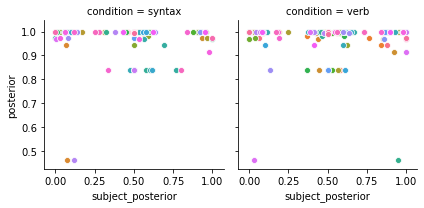

In [178]:
g = sns.FacetGrid(data=merged, col="condition", hue="uniqueid")
g.map(sns.scatterplot, "subject_posterior", "posterior")

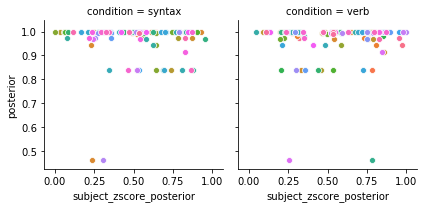

In [179]:
g = sns.FacetGrid(data=merged, col="condition", hue="uniqueid")
g.map(sns.scatterplot, "subject_zscore_posterior", "posterior")

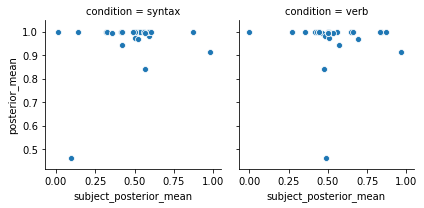

In [180]:
g = sns.FacetGrid(data=merged_avg.reset_index(), col="condition")
g.map(sns.scatterplot, "subject_posterior_mean", "posterior_mean")

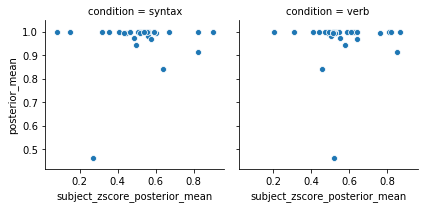

In [181]:
g = sns.FacetGrid(data=merged_avg.reset_index(), col="condition")
g.map(sns.scatterplot, "subject_zscore_posterior_mean", "posterior_mean")

---

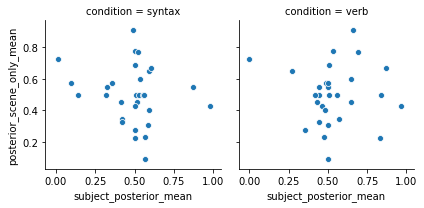

In [183]:
g = sns.FacetGrid(data=merged_avg.reset_index(), col="condition")
g.map(sns.scatterplot, "subject_posterior_mean", "posterior_scene_only_mean")

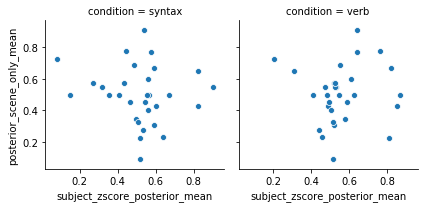

In [187]:
g = sns.FacetGrid(data=merged_avg.reset_index(), col="condition")
g.map(sns.scatterplot, "subject_zscore_posterior_mean", "posterior_scene_only_mean")